##*Student Academic Preformance*


The main objective is to build a machine learning model that helps identify factors affecting student performance and can potentially be used to improve grades through targeted interventions.



















































































































































## <b> <font color=green> STEP (1) Problem Definition, Scoping & Framing </font> </b>


### 1.1) Load Libraries
Import all necessary libraries for the project.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import joblib

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import (
    StandardScaler,
    OneHotEncoder,
    OrdinalEncoder,
    FunctionTransformer
)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor, VotingClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay
)


### 1.2) Load The Dataset
Load the dataset and display the first few rows.

In [ ]:
df = pd.read_csv('new.csv')
print(df.head())

  school sex   age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP   F  18.0       U     GT3       A   4.0   4.0  at_home   teacher   
1     GP   F  17.0       U     GT3       T   1.0   1.0      NaN     other   
2     GP   F  15.0       U     LE3       T   1.0   1.0  at_home     other   
3     GP   F  15.0       U     GT3       T   4.0   2.0   health  services   
4     GP   F  16.0       U     GT3       T   3.0   3.0    other     other   

   ... freetime goout  Dalc  Walc  health absences    G1    G2    G3  \
0  ...      3.0   4.0   1.0   1.0     3.0      4.0   0.0  11.0  11.0   
1  ...      3.0   3.0   1.0   1.0     3.0      2.0   9.0  11.0  11.0   
2  ...      3.0   2.0   2.0   3.0     3.0      6.0  12.0  13.0  12.0   
3  ...      2.0   2.0   1.0   1.0     5.0      0.0  14.0  14.0  14.0   
4  ...      3.0   2.0   1.0   2.0     5.0      0.0  11.0  13.0  13.0   

  noise_column  
0          123  
1          NaN  
2       noise3  
3          NaN  
4          NaN  

[

In [ ]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,noise_column
0,GP,F,18.0,U,GT3,A,4.0,4.0,at_home,teacher,...,3.0,4.0,1.0,1.0,3.0,4.0,0.0,11.0,11.0,123
1,GP,F,17.0,U,GT3,T,1.0,1.0,NaN,other,...,3.0,3.0,1.0,1.0,3.0,2.0,9.0,11.0,11.0,NaN
2,GP,F,15.0,U,LE3,T,1.0,1.0,at_home,other,...,3.0,2.0,2.0,3.0,3.0,6.0,12.0,13.0,12.0,noise3
3,GP,F,15.0,U,GT3,T,4.0,2.0,health,services,...,2.0,2.0,1.0,1.0,5.0,0.0,14.0,14.0,14.0,NaN
4,GP,F,16.0,U,GT3,T,3.0,3.0,other,other,...,3.0,2.0,1.0,2.0,5.0,0.0,11.0,13.0,13.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
663,GP,F,15.0,R,GT3,T,1.0,1.0,other,other,...,5.0,5.0,1.0,1.0,1.0,2.0,8.0,9.0,9.0,NaN
664,MS,F,16.0,U,GT3,T,2.0,2.0,other,services,...,4.0,3.0,1.0,4.0,3.0,1.0,9.0,10.0,10.0,123
665,GP,M,16.0,R,GT3,T,2.0,NaN,at_home,other,...,2.0,2.0,1.0,2.0,3.0,4.0,12.0,10.0,11.0,123
666,GP,F,17.0,U,GT3,T,3.0,1.0,services,services,...,4.0,3.0,2.0,3.0,5.0,0.0,17.0,18.0,17.0,irrelevant


## <b> <font color=green> STEP (2) Data Exploration & Understanding </font> </b>

### 2.1) Descriptive Statistics
Generate summary statistics for the dataset.

In [ ]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,662.000000,662.000000,661.000000,661.000000,662.000000,662.000000,662.000000,661.000000,662.000000,662.000000,662.000000,662.000000,662.000000,661.000000,662.000000,662.000000
mean,16.725076,2.525680,2.304085,1.568835,1.925982,0.214502,3.932024,3.178517,3.187311,1.492447,2.276435,3.521148,3.655589,11.414523,11.580060,11.922961
std,1.205110,1.134698,1.100880,0.748856,0.826356,0.578930,0.951105,1.053806,1.168661,0.905072,1.272550,1.454922,4.619808,2.747015,2.908399,3.218016
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668 entries, 0 to 667
Data columns (total 34 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   school        668 non-null    object 
 1   sex           662 non-null    object 
 2   age           662 non-null    float64
 3   address       662 non-null    object 
 4   famsize       662 non-null    object 
 5   Pstatus       662 non-null    object 
 6   Medu          662 non-null    float64
 7   Fedu          661 non-null    float64
 8   Mjob          662 non-null    object 
 9   Fjob          662 non-null    object 
 10  reason        662 non-null    object 
 11  guardian      662 non-null    object 
 12  traveltime    661 non-null    float64
 13  studytime     662 non-null    float64
 14  failures      662 non-null    float64
 15  schoolsup     662 non-null    object 
 16  famsup        661 non-null    object 
 17  paid          662 non-null    object 
 18  activities    662 non-null    

In [ ]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'noise_column'],
      dtype='object')

In [ ]:
df.shape

(668, 34)

### 2.2) Data Visualizations
Visualize the data to identify patterns and relationships.

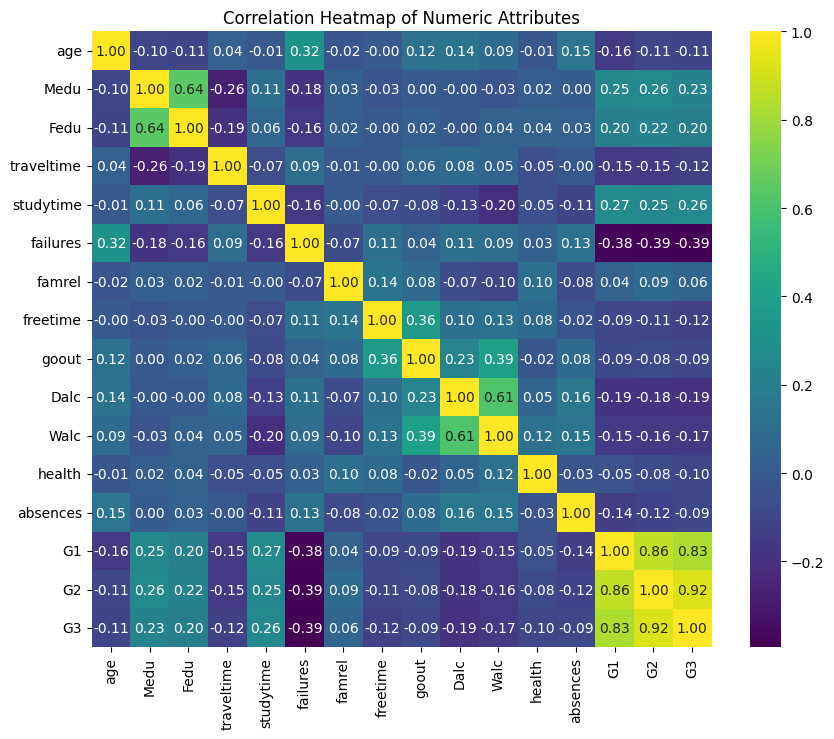

In [ ]:
plt.figure(figsize=(10, 8))
corr = df.select_dtypes(include='number').corr()
sns.heatmap(corr, annot=True, cmap='viridis', fmt='.2f')
plt.title('Correlation Heatmap of Numeric Attributes')
plt.show()

/tmp/ipython-input-9-3696681985.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='studytime', y='G3', palette='mako', ax=axes[4])


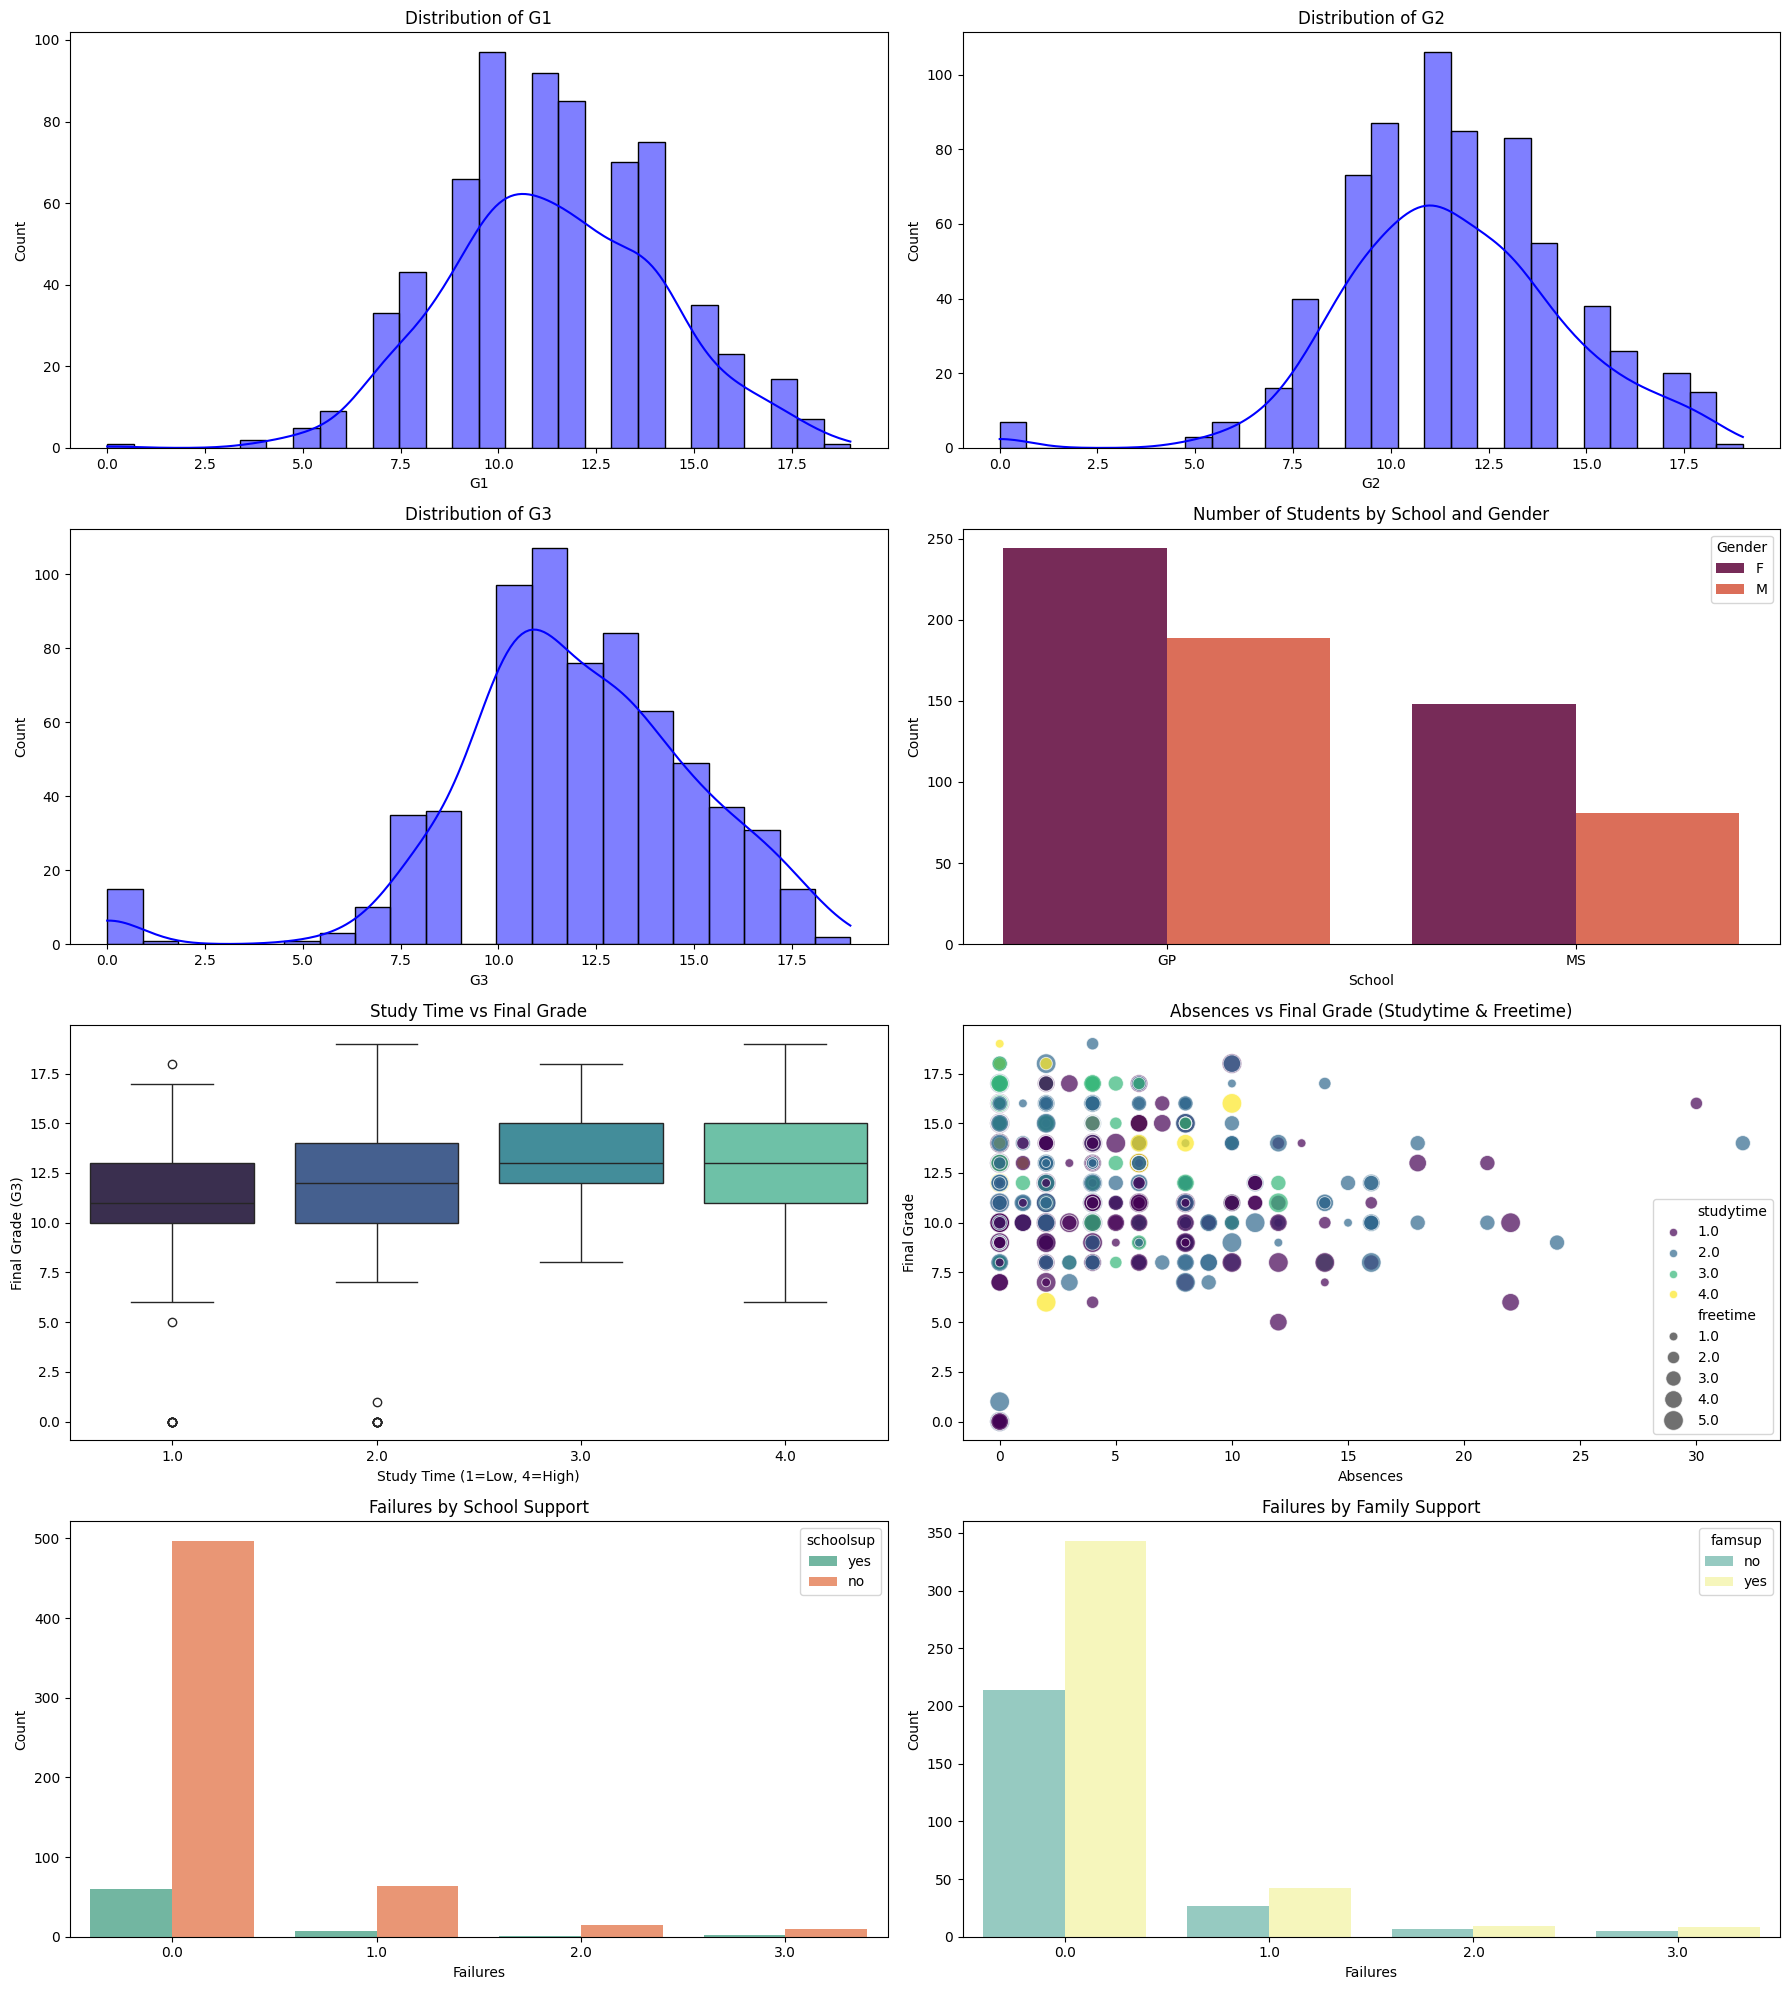

In [ ]:
fig, axes = plt.subplots(4, 2, figsize=(18, 20))
axes = axes.flatten()  # Flatten for easy indexing

# 1. Distribution plots for G1, G2, G3
for i, g in enumerate(['G1', 'G2', 'G3']):
    sns.histplot(df[g], kde=True, color='blue', ax=axes[i])
    axes[i].set_title(f'Distribution of {g}')

# 2. Students by School and Gender
sns.countplot(data=df, x='school', hue='sex', palette='rocket', ax=axes[3])
axes[3].set_title('Number of Students by School and Gender')
axes[3].set_xlabel('School')
axes[3].set_ylabel('Count')
axes[3].legend(title='Gender')

# 3. Study Time vs Final Grade
sns.boxplot(data=df, x='studytime', y='G3', palette='mako', ax=axes[4])
axes[4].set_title('Study Time vs Final Grade')
axes[4].set_xlabel('Study Time (1=Low, 4=High)')
axes[4].set_ylabel('Final Grade (G3)')

# 4. Absences vs Final Grade with hue/size
sns.scatterplot(
    data=df,
    x='absences',
    y='G3',
    hue='studytime',
    size='freetime',
    sizes=(40, 200),
    alpha=0.7,
    palette='viridis',
    ax=axes[5]
)
axes[5].set_title("Absences vs Final Grade (Studytime & Freetime)")
axes[5].set_xlabel("Absences")
axes[5].set_ylabel("Final Grade")

# 5. Failures by School Support
sns.countplot(data=df, x='failures', hue='schoolsup', palette='Set2', ax=axes[6])
axes[6].set_title("Failures by School Support")
axes[6].set_xlabel("Failures")
axes[6].set_ylabel("Count")

# 6. Failures by Family Support
sns.countplot(data=df, x='failures', hue='famsup', palette='Set3', ax=axes[7])
axes[7].set_title("Failures by Family Support")
axes[7].set_xlabel("Failures")
axes[7].set_ylabel("Count")

# Optional: Remove empty plots if less than 8
if len(axes) > 8:
    for i in range(8, len(axes)):
        fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


## <b> <font color=green> STEP (3) Data Preparation & Feature Engineering </font> </b>

### 3.1) Data Cleaning
Handle missing values and outliers.

In [ ]:
unique_columns = [col for col in df.columns if df[col].is_unique]
print("Unique columns:", unique_columns)

Unique columns: []


In [ ]:
print(df.isnull().sum())

school            0
sex               6
age               6
address           6
famsize           6
Pstatus           6
Medu              6
Fedu              7
Mjob              6
Fjob              6
reason            6
guardian          6
traveltime        7
studytime         6
failures          6
schoolsup         6
famsup            7
paid              6
activities        6
nursery           6
higher            6
internet          6
romantic          6
famrel            6
freetime          7
goout             6
Dalc              6
Walc              6
health            6
absences          6
G1                7
G2                6
G3                6
noise_column    110
dtype: int64


In [ ]:
df_cleaned = df.dropna()
print("\nDataFrame after dropping rows with null values:")
print(df_cleaned.head())
print("\nNull values after dropping:")
print(df_cleaned.isnull().sum())


DataFrame after dropping rows with null values:
   school sex   age address famsize Pstatus  Medu  Fedu      Mjob     Fjob  \
0      GP   F  18.0       U     GT3       A   4.0   4.0   at_home  teacher   
2      GP   F  15.0       U     LE3       T   1.0   1.0   at_home    other   
6      GP   M  16.0       U     LE3       T   2.0   2.0     other    other   
7      GP   F  17.0       U     GT3       A   4.0   4.0     other  teacher   
11     GP   F  15.0       U     GT3       T   2.0   1.0  services    other   

    ... freetime goout  Dalc  Walc  health absences    G1    G2    G3  \
0   ...      3.0   4.0   1.0   1.0     3.0      4.0   0.0  11.0  11.0   
2   ...      3.0   2.0   2.0   3.0     3.0      6.0  12.0  13.0  12.0   
6   ...      4.0   4.0   1.0   1.0     3.0      0.0  13.0  12.0  13.0   
7   ...      1.0   4.0   1.0   1.0     1.0      2.0  10.0  13.0  13.0   
11  ...      2.0   2.0   1.0   1.0     4.0      0.0  10.0  12.0  13.0   

   noise_column  
0           123  
2      

In [ ]:
duplicate_rows = df[df.duplicated()]
print("Duplicate rows:")
duplicate_rows

Duplicate rows:


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,noise_column
655,GP,M,17.0,R,LE3,A,4.0,4.0,teacher,other,...,NaN,3.0,2.0,3.0,4.0,0.0,12.0,12.0,12.0,irrelevant
658,GP,F,17.0,U,GT3,T,1.0,1.0,other,other,...,4.0,4.0,1.0,3.0,1.0,0.0,14.0,15.0,15.0,noise1
665,GP,M,16.0,R,GT3,T,2.0,NaN,at_home,other,...,2.0,2.0,1.0,2.0,3.0,4.0,12.0,10.0,11.0,123
667,GP,F,15.0,U,GT3,T,4.0,4.0,services,services,...,4.0,4.0,2.0,3.0,5.0,4.0,12.0,11.0,12.0,123


In [ ]:
# Drop duplicate rows
df_cleaned = df_cleaned.drop_duplicates()

print("\nDataFrame after dropping duplicate rows:")
print(df_cleaned.head())

print("\nDuplicate rows after dropping:")
duplicate_rows_after = df_cleaned[df_cleaned.duplicated()]
duplicate_rows_after


DataFrame after dropping duplicate rows:
   school sex   age address famsize Pstatus  Medu  Fedu      Mjob     Fjob  \
0      GP   F  18.0       U     GT3       A   4.0   4.0   at_home  teacher   
2      GP   F  15.0       U     LE3       T   1.0   1.0   at_home    other   
6      GP   M  16.0       U     LE3       T   2.0   2.0     other    other   
7      GP   F  17.0       U     GT3       A   4.0   4.0     other  teacher   
11     GP   F  15.0       U     GT3       T   2.0   1.0  services    other   

    ... freetime goout  Dalc  Walc  health absences    G1    G2    G3  \
0   ...      3.0   4.0   1.0   1.0     3.0      4.0   0.0  11.0  11.0   
2   ...      3.0   2.0   2.0   3.0     3.0      6.0  12.0  13.0  12.0   
6   ...      4.0   4.0   1.0   1.0     3.0      0.0  13.0  12.0  13.0   
7   ...      1.0   4.0   1.0   1.0     1.0      2.0  10.0  13.0  13.0   
11  ...      2.0   2.0   1.0   1.0     4.0      0.0  10.0  12.0  13.0   

   noise_column  
0           123  
2        noise

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,noise_column


In [ ]:
# Demographic Info
df_demo = df[['sex', 'age', 'address', 'famsize', 'Pstatus']]

# Parental Info
df_parent = df[['Medu', 'Fedu', 'Mjob', 'Fjob', 'guardian']]

# School Support / Activities
df_support = df[['schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']]

# Lifestyle and Behavior
df_life = df[['studytime', 'failures', 'goout', 'Dalc', 'Walc', 'freetime', 'absences']]

# Grades
df_grades = df[['G1', 'G2', 'G3']]  # G3 is usually your target

In [ ]:
print("Demographic Info:")
print(df_demo.head())
print("\nParental Info:")
print(df_parent.head())
print("\nSchool Support / Activities:")
print(df_support.head())
print("\nLifestyle and Behavior:")
print(df_life.head())
print("\nGrades:")
print(df_grades.head())

Demographic Info:
  sex   age address famsize Pstatus
0   F  18.0       U     GT3       A
1   F  17.0       U     GT3       T
2   F  15.0       U     LE3       T
3   F  15.0       U     GT3       T
4   F  16.0       U     GT3       T

Parental Info:
   Medu  Fedu     Mjob      Fjob guardian
0   4.0   4.0  at_home   teacher   mother
1   1.0   1.0      NaN     other   father
2   1.0   1.0  at_home     other   mother
3   4.0   2.0   health  services   mother
4   3.0   3.0    other     other   father

School Support / Activities:
  schoolsup famsup paid activities nursery higher internet romantic
0       yes     no   no         no     yes    yes       no       no
1        no    yes  NaN         no      no    yes      yes       no
2       yes     no   no         no     yes    yes      yes       no
3        no    yes   no        yes     yes    yes      yes      yes
4        no    yes   no         no     yes    yes       no       no

Lifestyle and Behavior:
   studytime  failures  goout  Dalc

In [ ]:
# Replace unwanted values with NaN
df['noise_column'] = df['noise_column'].replace(['noise1', 'noise2', 'noise3', 'irrelevant'], np.nan)

# Then drop the column if it's all NaN now
if df['noise_column'].isnull().all():
    df = df.drop(columns=['noise_column'])

# OR fill with a default value (if you want to keep the column)
# df['noise_column'] = df['noise_column'].fillna('cleaned')

### 3.2) Feature Selection
Select the most relevant features for the model.

### 3.3) Data Transforms
Apply transformations to prepare the data for modeling.

Top 5 important features (Random Forest):
G2          0.835041
absences    0.033986
G1          0.017179
famrel      0.012304
Walc        0.009894
dtype: float64


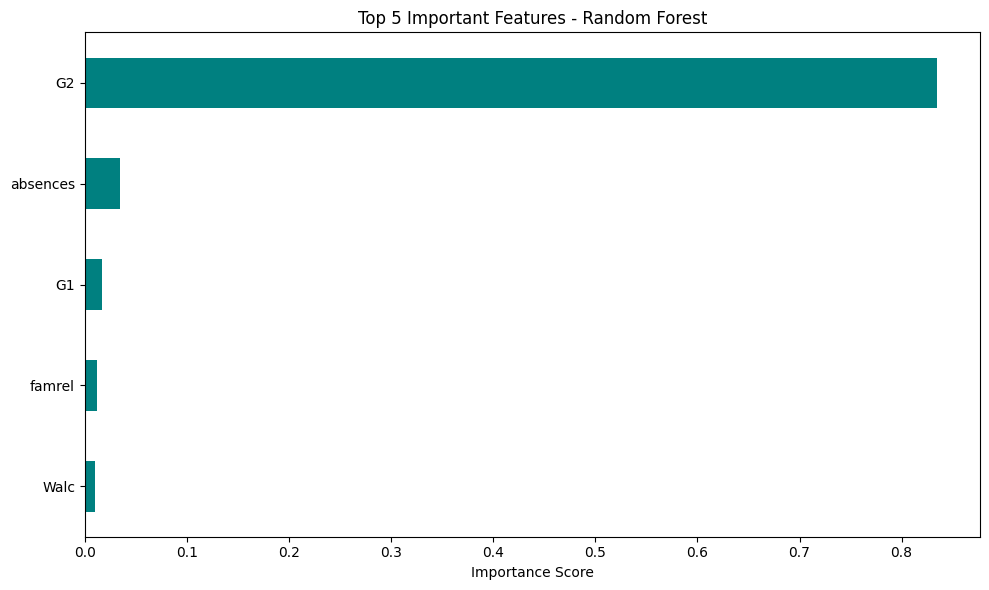

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

# Load and clean dataset
df = pd.read_csv('new.csv')  # Update path if needed
df = df.drop(columns=['noise_column'], errors='ignore')

# Encode categorical columns
#Transforms strings (like names, categories) to numbers using Label Encoding.
#Essential for most machine learning models to work correctly.

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = LabelEncoder().fit_transform(df[col])

# Split into features and target
X = df.drop(columns=['G3'])
y = df['G3']


#Trains a Random Forest Regressor on the data.
#Extracts and shows the Top 5 important features affecting prediction (G3 - final grade).
# Fit Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_
feature_importance = pd.Series(importances, index=X.columns).sort_values(ascending=False)

# Show top features
print("Top 5 important features (Random Forest):")
print(feature_importance.head(5))

# Plot
plt.figure(figsize=(10, 6))
feature_importance.head(5).plot(kind='barh', color='teal')
plt.title('Top 5 Important Features - Random Forest')
plt.xlabel('Importance Score')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [ ]:
df.dtypes

,0
school,int64
sex,int64
age,float64
address,int64
famsize,int64
Pstatus,int64
Medu,float64
Fedu,float64
Mjob,int64
Fjob,int64


In [ ]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18.0,1,0,0,4.0,4.0,0,4,...,4.0,3.0,4.0,1.0,1.0,3.0,4.0,0.0,11.0,11.0
2,0,0,15.0,1,1,1,1.0,1.0,0,2,...,4.0,3.0,2.0,2.0,3.0,3.0,6.0,12.0,13.0,12.0
3,0,0,15.0,1,0,1,4.0,2.0,1,3,...,3.0,2.0,2.0,1.0,1.0,5.0,0.0,14.0,14.0,14.0
4,0,0,16.0,1,0,1,3.0,3.0,2,2,...,4.0,3.0,2.0,1.0,2.0,5.0,0.0,11.0,13.0,13.0
6,0,1,16.0,1,1,1,2.0,2.0,2,2,...,4.0,4.0,4.0,1.0,1.0,3.0,0.0,13.0,12.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660,1,0,17.0,1,0,1,4.0,1.0,1,0,...,3.0,2.0,2.0,1.0,1.0,5.0,0.0,8.0,10.0,9.0
661,0,0,17.0,1,1,1,4.0,3.0,1,2,...,3.0,2.0,3.0,1.0,2.0,3.0,0.0,14.0,12.0,12.0
662,0,1,19.0,1,0,1,4.0,2.0,1,2,...,5.0,4.0,4.0,1.0,1.0,1.0,9.0,11.0,10.0,10.0
664,1,0,16.0,1,0,1,2.0,2.0,2,3,...,4.0,4.0,3.0,1.0,4.0,3.0,1.0,9.0,10.0,10.0


In [ ]:
# Split into training and validation set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
import numpy as np

# Use Stratified K-Fold for balanced splits (for classification)
#n_splits=10: The dataset will be split into 10 equal parts (folds).
#shuffle=True: The data is shuffled before splitting (improves randomness).

kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scoring = 'accuracy'  # Can also be 'f1', 'precision', etc.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

#Logistic Regression, KNN, Naive Bayes, and SVM are evaluated.
#Uses Stratified K-Fold for balanced class distribution.
#Outputs mean accuracy and standard deviation for each model.


models = []
models.append(('LR', LogisticRegression(max_iter=1000)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Evaluate each model
results = []
names = []

for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print(f"{name}: {cv_results.mean():.3f} ({cv_results.std():.3f})")


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/mod

LR: 0.364 (0.058)
KNN: 0.292 (0.056)
NB: 0.165 (0.052)


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


SVM: 0.264 (0.026)


/tmp/ipython-input-31-2716368504.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(results, labels=names)


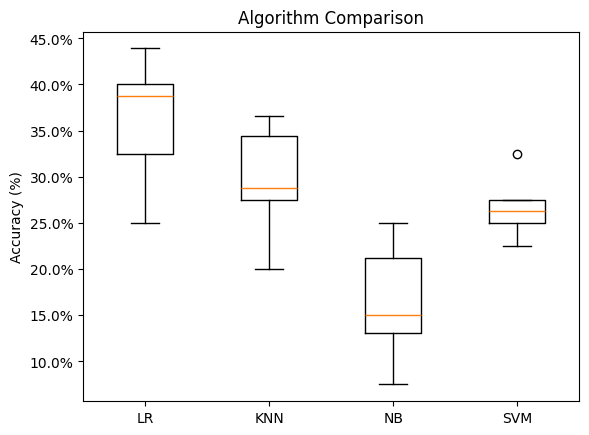

In [ ]:
from matplotlib.ticker import PercentFormatter
plt.gca().yaxis.set_major_formatter(PercentFormatter(1.0))  # 1.0 = decimal to percent
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.ylabel('Accuracy (%)')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1.0))
plt.show()

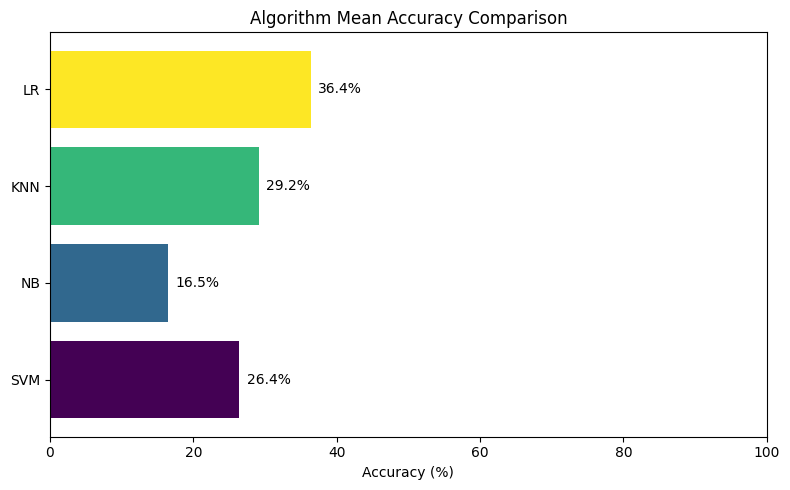

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.cm import viridis

# Remove 'CART' if it exists
if 'CART' in names:
    idx = names.index('CART')
    del names[idx]
    del results[idx]



# Calculate mean accuracy (as percent)
mean_scores = [result.mean() for result in results]
mean_scores_percent = [score * 100 for score in mean_scores]

# Reverse for display (optional)
names = names[::-1]
mean_scores_percent = mean_scores_percent[::-1]

# Generate viridis colors
colors = viridis(np.linspace(0, 1, len(names)))

# Horizontal bar chart
plt.figure(figsize=(8, 5))
plt.barh(names, mean_scores_percent, color=colors)
plt.xlabel('Accuracy (%)')
plt.title('Algorithm Mean Accuracy Comparison')
plt.xlim(0, 100)

# Add value labels to bars
for i, v in enumerate(mean_scores_percent):
    plt.text(v + 1, i, f"{v:.1f}%", va='center')

plt.tight_layout()
plt.show()


##LogisticRegression

In [ ]:
selected_features = ['G2', 'absences', 'G1', 'famrel', 'Walc']

X = df[selected_features]
y = df['G3']

In [ ]:
from sklearn.model_selection import train_test_split

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
# Stratified 10-fold CV with shuffling and fixed seed for reproducibility
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Use accuracy as the evaluation metric
scoring = 'accuracy'

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=1000)

cv_results = cross_val_score(lr_model, X_train, y_train, cv=kfold, scoring=scoring)


print("\n")
print("#####################################")
print(f"Logistic Regression Accuracy: {cv_results.mean():.2%} ± {cv_results.std():.2%}")
print("#####################################")
print("\n")

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/mod



#####################################
Logistic Regression Accuracy: 44.13% ± 6.43%
#####################################




/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre


Validation Accuracy: 40.59%

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         1
         7.0       0.00      0.00      0.00         2
         8.0       0.29      0.50      0.36         4
         9.0       0.00      0.00      0.00         6
        10.0       0.62      0.26      0.37        19
        11.0       0.43      0.86      0.57        14
        12.0       0.33      0.22      0.27         9
        13.0       0.35      0.50      0.41        12
        14.0       0.50      0.27      0.35        11
        15.0       0.36      0.62      0.45         8
        16.0       0.50      0.20      0.29         5
        17.0       0.43      0.50      0.46         6
        18.0       0.50      0.33      0.40         3
        19.0       0.00      0.00      0.00         1

    accuracy                           0.41       101
   macro avg       0.38      0.38      0.35       101
weighted avg       0.42    

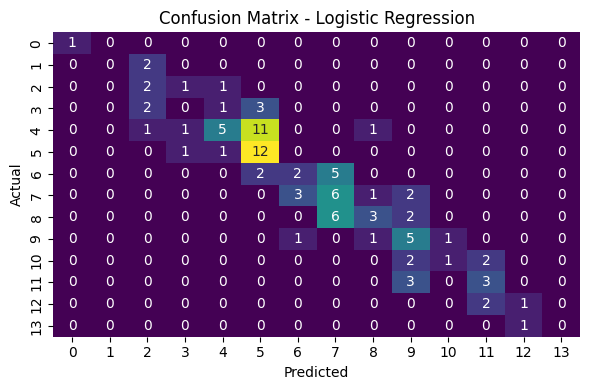

In [ ]:
# Train on full training data
lr_model.fit(X_train, y_train)

# Predict on validation data
y_pred = lr_model.predict(X_val)

# Accuracy
acc = accuracy_score(y_val, y_pred)
print(f"\nValidation Accuracy: {acc:.2%}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_val, y_pred))

# Confusion matrix
cm = confusion_matrix(y_val, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', cbar=False)
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()


##KNN

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

Validation Accuracy: 34.65%

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         1
         7.0       0.00      0.00      0.00         2
         8.0       0.29      0.50      0.36         4
         9.0       0.00      0.00      0.00         6
        10.0       0.57      0.63      0.60        19
        11.0       0.33      0.36      0.34        14
        12.0       0.44      0.44      0.44         9
        13.0       0.40      0.50      0.44        12
        14.0       0.22      0.18      0.20        11
        15.0       0.18      0.25      0.21         8
        16.0       0.17      0.20      0.18         5
        17.0       0.00      0.00      0.00         6
        18.0       0.00      0.00      0.00         3
        19.0       0.00      0.00      0.00         1

    accuracy                           0.35       101
   macro avg       0.26      0.29      0.27       101
weighted avg       0.31     

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


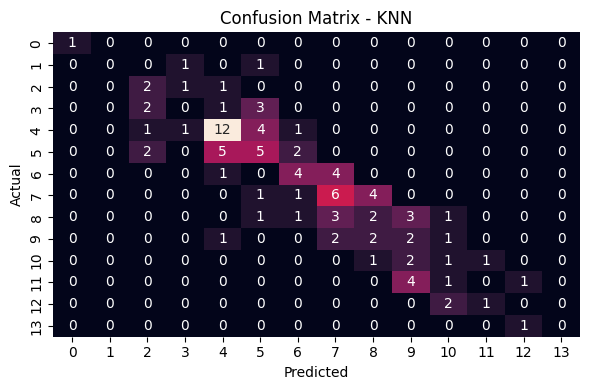

In [ ]:
# Initialize and train model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

# Predict
y_pred = knn_model.predict(X_val_scaled)

# Accuracy
acc = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {acc:.2%}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_val, y_pred))

# Confusion matrix
cm = confusion_matrix(y_val, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='rocket', cbar=False)
plt.title('Confusion Matrix - KNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()


##Algorithm Tuning (Hyperparameter Tuning)
Tune Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['liblinear', 'lbfgs']
}

grid_lr = GridSearchCV(LogisticRegression(max_iter=1000), param_grid_lr, cv=5, scoring='accuracy')
grid_lr.fit(X_train, y_train)
print("\n")
print("################################################")
print("Best LR Parameters:", grid_lr.best_params_)
print("Best LR Accuracy:", grid_lr.best_score_)
print("################################################")
print("\n")


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modu



################################################
Best LR Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Best LR Accuracy: 0.45138888888888895
################################################




/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


knn


In [ ]:
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='accuracy')
grid_knn.fit(X_train_scaled, y_train)
print("\n")
print("################################################")
print("Best KNN Parameters:", grid_knn.best_params_)
print("Best KNN Accuracy:", grid_knn.best_score_)
print("################################################")
print("\n")


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(




################################################
Best KNN Parameters: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
Best KNN Accuracy: 0.35891975308641977
################################################




/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


KNN Accuracy: 0.3465346534653465
KNN Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         1
         7.0       0.00      0.00      0.00         2
         8.0       0.29      0.50      0.36         4
         9.0       0.00      0.00      0.00         6
        10.0       0.57      0.63      0.60        19
        11.0       0.33      0.36      0.34        14
        12.0       0.44      0.44      0.44         9
        13.0       0.40      0.50      0.44        12
        14.0       0.22      0.18      0.20        11
        15.0       0.18      0.25      0.21         8
        16.0       0.17      0.20      0.18         5
        17.0       0.00      0.00      0.00         6
        18.0       0.00      0.00      0.00         3
        19.0       0.00      0.00      0.00         1

    accuracy                           0.35       101
   macro avg       0.26      0.29      0.27       101
weighted avg       

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


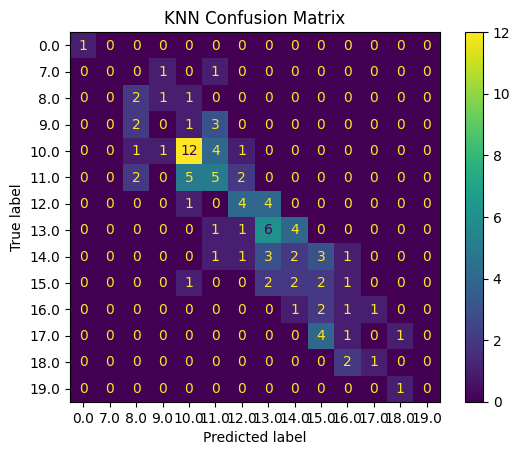

Logistic Regression Accuracy: 0.43564356435643564
Logistic Regression Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         1
         7.0       0.00      0.00      0.00         2
         8.0       0.29      0.50      0.36         4
         9.0       0.00      0.00      0.00         6
        10.0       0.67      0.32      0.43        19
        11.0       0.44      0.86      0.59        14
        12.0       0.40      0.22      0.29         9
        13.0       0.39      0.58      0.47        12
        14.0       0.50      0.27      0.35        11
        15.0       0.40      0.75      0.52         8
        16.0       1.00      0.20      0.33         5
        17.0       0.40      0.33      0.36         6
        18.0       0.50      0.67      0.57         3
        19.0       0.00      0.00      0.00         1

    accuracy                           0.44       101
   macro avg       0.43      0.41      0

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


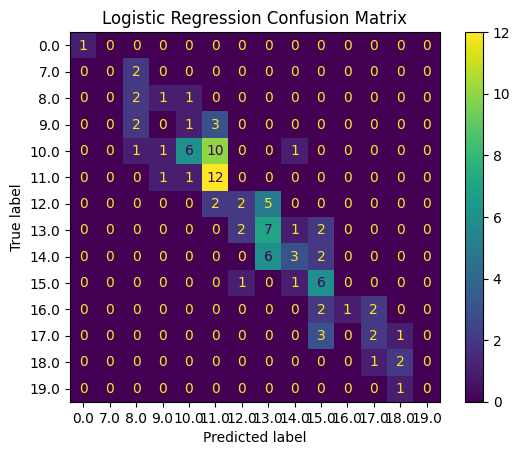

Voting Ensemble Accuracy: 0.3564356435643564
Voting Ensemble Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         1
         7.0       0.00      0.00      0.00         2
         8.0       0.29      0.50      0.36         4
         9.0       0.00      0.00      0.00         6
        10.0       0.54      0.37      0.44        19
        11.0       0.36      0.57      0.44        14
        12.0       0.50      0.44      0.47         9
        13.0       0.41      0.58      0.48        12
        14.0       0.22      0.18      0.20        11
        15.0       0.18      0.25      0.21         8
        16.0       0.25      0.20      0.22         5
        17.0       0.00      0.00      0.00         6
        18.0       0.50      0.67      0.57         3
        19.0       0.00      0.00      0.00         1

    accuracy                           0.36       101
   macro avg       0.30      0.34      0.31      

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


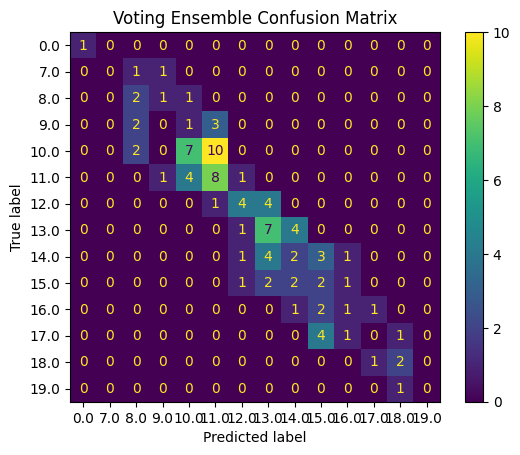

ValueError: Specifying the columns using strings is only supported for dataframes.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.ensemble import VotingClassifier
import joblib

# Preprocessor setup (example columns — adjust based on your dataset)
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

# Train KNN model
knn_model = Pipeline([
    ('preprocessing', preprocessor),
    ('model', KNeighborsClassifier(n_neighbors=5))
])
knn_model.fit(X_train, y_train)

#  Grid Search for Logistic Regression
lr_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('model', LogisticRegression(max_iter=1000))
])

param_grid = {
    'model__C': [0.1, 1.0, 10.0],
    'model__solver': ['liblinear', 'lbfgs']
}

lr_grid = GridSearchCV(lr_pipeline, param_grid, cv=5, scoring='accuracy')
lr_grid.fit(X_train, y_train)

# Evaluate KNN
y_pred_knn = knn_model.predict(X_val)
print("KNN Accuracy:", accuracy_score(y_val, y_pred_knn))
print("KNN Classification Report:\n", classification_report(y_val, y_pred_knn))
ConfusionMatrixDisplay.from_estimator(knn_model, X_val, y_val)
plt.title("KNN Confusion Matrix")
plt.show()

#  Evaluate Logistic Regression
y_pred_lr = lr_grid.best_estimator_.predict(X_val)
print("Logistic Regression Accuracy:", accuracy_score(y_val, y_pred_lr))
print("Logistic Regression Classification Report:\n", classification_report(y_val, y_pred_lr))
ConfusionMatrixDisplay.from_estimator(lr_grid.best_estimator_, X_val, y_val)
plt.title("Logistic Regression Confusion Matrix")
plt.show()

# Create and evaluate Voting Classifier
ensemble_model = VotingClassifier(estimators=[
    ('lr', lr_grid.best_estimator_),
    ('knn', knn_model)
], voting='soft')

ensemble_model.fit(X_train, y_train)
y_pred_ensemble = ensemble_model.predict(X_val)
print("Voting Ensemble Accuracy:", accuracy_score(y_val, y_pred_ensemble))
print("Voting Ensemble Classification Report:\n", classification_report(y_val, y_pred_ensemble))
ConfusionMatrixDisplay.from_estimator(ensemble_model, X_val, y_val)
plt.title("Voting Ensemble Confusion Matrix")
plt.show()

# Train on full data and save the model
X_processed = preprocessor.fit_transform(X)
ensemble_model.fit(X_processed, y)
joblib.dump(ensemble_model, "final_health_ensemble_model.pkl")
print("✅ Model saved as 'final_health_ensemble_model.pkl'")


In [ ]:
from sklearn.pipeline import Pipeline

# === Step 3: Full Pipeline with Model ===
pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('model', LogisticRegression(max_iter=1000))
])

# === Step 4: Split Data, Train, Evaluate ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix Plot
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("Logistic Regression - Confusion Matrix")
plt.show()

# === Step 5: Retrain on Full Data and Save ===
pipeline.fit(X, y)
joblib.dump(pipeline, "simple_student_model.pkl")
print("Model saved to 'simple_student_model.pkl'")